<a href="https://colab.research.google.com/github/HarshMartinTopno/From_Scratch/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

### Perceptron Implementation

The Perceptron Learning Rule is a simple algorithm used to train a perceptron, which is one of the earliest types of artificial neural networks.

**Goal:**

The perceptron aims to learn how to classify data points into one of two categories (e.g., "yes" or "no," "1" or "0") by finding the best line (or hyperplane in higher dimensions) that separates the data.

**Steps of the Perceptron Learning Rule
Initialize Weights:**


* **Initialize Weights:**
 Start with random or zero values for the weights and bias. These are parameters that will be adjusted to improve classification.

* **Feed Input and Compute Output:**

For a given input vector (*X*), compute the perceptron's output ($𝑦_{pred}$) using the formula:

   * $y_{pred}$ = step(*W* . *X* + *b*)
      * W: Weight vector
      * X: Input vector.
      * b: Bias.
      * step: Activation function that outputs 1 if the result is positive and 0 otherwise.

* **Compare Prediction with Actual Output:**

  Check if the perceptron’s prediction matches the true label ($y_{true}$):
    * If $y_{pred}$ == $y_{true}$ :
      * True: No change to the weights or bias

      * False: Update the weights and bias

* **Update Weights and Bias:**

  When the prediction is wrong, adjust the weights and bias using the rule:

 * $𝑊_{new} = 𝑊_{old} + 𝜂⋅( 𝑦_{true} - y_{pred}) . X$

 * $b_{new} = b_{old} + 𝜂 . (y_{true} - y_{pred}) $

    * η: Learning rate (a small positive number that controls the step size of adjustments).

    * $y_{true} - y_{pred}$ : The error term.

* **Repeat for All Data Points:**

  Go through all data points repeatedly until the perceptron classifies all points correctly (or reaches a stopping criterion, like a maximum number of iterations).


* Key Points
  * **Linear Separability:** The perceptron  only works if the data is linearly separable (i.e., you can draw a straight line to separate the categories).

  * **Guaranteed Convergence:** If the data is linearly separable, the perceptron learning rule will eventually find the correct weights and bias.

In [14]:
class Perceptron:

  def __init__(self, eta = 0.01, n_iters = 50, random_state = 1):

    self.eta = eta   # learning rate
    self.n_iters = n_iters # number of epochs
    self.random_state = random_state

  def fit(self, X, y):

    rgen = np.random.RandomState(self.random_state)
    # initial weight vector contains small random numbers drawn from a normal distribution with a standard deviation of 0.01
    self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = X.shape[1])
    self.b_ = float(0.) # bias with initial value zero
    self.errors_ = []

    for _ in range(self.n_iters):
      errors = 0
      for xi, target in zip(X,y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)
      self.errors_.append(errors)
    return self
  def net_input(self, X):

    return np.dot(X, self.w_) + self.b_

  def predict(self, X):

    return np.where(self.net_input(X) >= 0.0, 1, 0)



### Using our model on Iris dataset


In [7]:
df = pd.read_csv(
'https://archive.ics.uci.edu/ml/'
'machine-learning-databases/iris/iris.data',
header=None, encoding='utf-8')

In [8]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Next, we extract the first 100 class labels that correspond to the 50 Iris-setosa and 50 Iris-versicolor
flowers and convert the class labels into the two integer class labels, 1 (versicolor) and 0 (setosa), that
we assign to a vector, y, where the values method of a pandas DataFrame yields the corresponding
NumPy representation.

Similarly, we extract the first feature column (sepal length) and the third feature column (petal length)
of those 100 training examples and assign them to a feature matrix, X, which we can visualize via a
two-dimensional scatterplot:


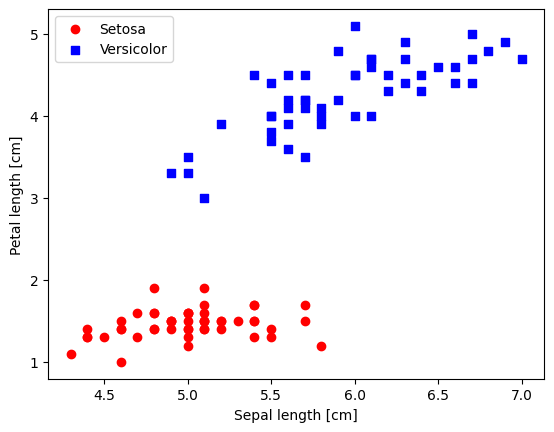

In [9]:
# selecting setosa and versicolor
y = df. iloc[0:100, 4].values
y = np.where(y == "Iris-setosa", 0 , 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values

# plotting data
plt.scatter(X[ :50, 0], X[:50, 1], color = 'red', marker = 'o', label = "Setosa")

plt.scatter(X[50:100, 0], X[50:100, 1], color = 'blue', marker = 's', label = "Versicolor")

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

Now, it’s time to train our perceptron algorithm on the Iris data subset that we just extracted. Also,
 plotting the misclassification error for each epoch to check whether the algorithm converged and
found a decision boundary that separates the two Iris flower classes:

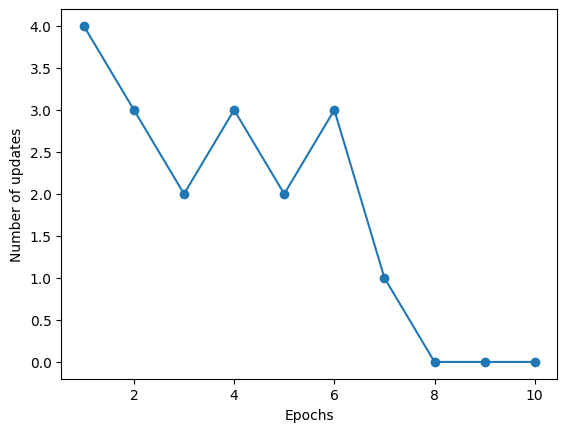

In [21]:
ppn = Perceptron(eta = 0.001, n_iters = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker = 'o')
plt.xlabel("Epochs")
plt.ylabel("Number of updates")
plt.show()

It is seen that the perceptron converged after the 8th epoach and should be able to classifiy the trainning examples perfectly


In [22]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  # setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class {cl}',
                edgecolor='black')

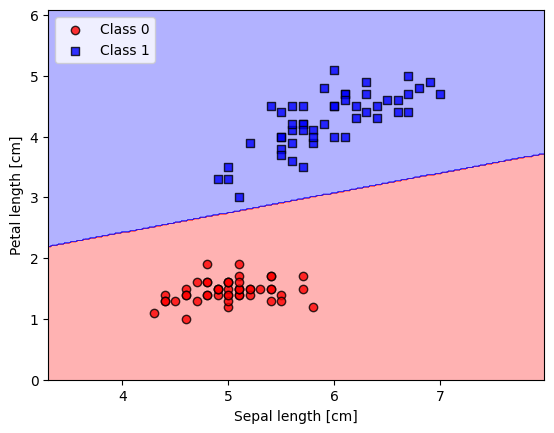

In [23]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()